<a href="https://colab.research.google.com/github/sajalsaini/ML-Projects/blob/main/Pet_Breeds_Classification_Playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
pip install fastbook

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
import fastbook

In [20]:
from fastbook import *

In [21]:
from fastai.vision.all import *

# Downloading the Dataset

In [22]:
path = untar_data(URLs.PETS)

In [23]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/images'),Path('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [24]:
(path/"images").ls()

(#7393) [Path('/root/.fastai/data/oxford-iiit-pet/images/Siamese_119.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/pug_157.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/newfoundland_4.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_45.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_21.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_34.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/chihuahua_9.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/wheaten_terrier_56.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/wheaten_terrier_9.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/shiba_inu_121.jpg')...]

Using REGEX to find for the breed of the animal. 

In [25]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/"images")

So what exactly are these two lines of code doing?

item_tfms = Resize(460),
batch_tfms = aug_transforms(size = 224,  min_scale = 0.75))

In the first line we can see that we are resizing our image to a size of 460px by 460px randomly. "Randomly" is a very important word here, because what we are trying to do it give our classifier images that are harder to identify, which in turn will make our classifier more and more "intelligent". Now, if the image that we are resizing is a landscape picture of size 1080px by 460px (length and height respectively), then the first line of code will pick out a random section out of the width of the picture. 

The second line of the code runs an augmented transformation on the 460px by 460px image created by the first line of code. In this it selects a 224px by 224px part of the image that is warped and rotated. 

These two lines of code allow us to have a distorted and warped image that allows our classifier to function more efficiently. 

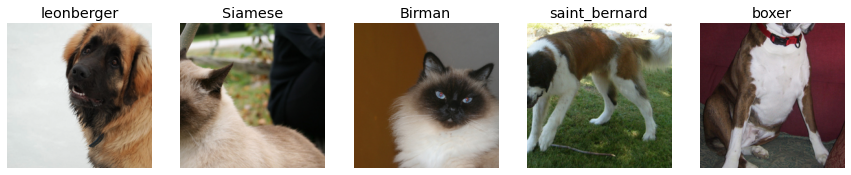

In [26]:
dls.show_batch(nrows = 1, ncols = 5)

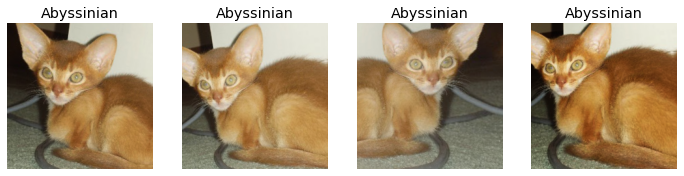

In [27]:
dls.show_batch(nrows = 1, ncols = 4, unique = True)

In [28]:
pets.summary(path/"images")

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/Abyssinian_131.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=311x320
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/Abyssinian_131.jpg
    applying partial gives
      Abyssinian
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(0)

Final sample: (PILImage mode=RGB size=311x320, TensorCategory(0))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up after_item

In [29]:
help(vision_learner)

Help on function vision_learner in module fastai.vision.learner:

vision_learner(dls, arch, normalize=True, n_out=None, pretrained=True, loss_func=None, opt_func=<function Adam at 0x7f26ea7de710>, lr=0.001, splitter=None, cbs=None, metrics=None, path=None, model_dir='models', wd=None, wd_bn_bias=False, train_bn=True, moms=(0.95, 0.85, 0.95), cut=None, n_in=3, init=<function kaiming_normal_ at 0x7f27030fc290>, custom_head=None, concat_pool=True, lin_ftrs=None, ps=0.5, pool=True, first_bn=True, bn_final=False, lin_first=False, y_range=None)
    Build a vision learner from `dls` and `arch`



In [30]:
learn = vision_learner(dls, resnet34, metrics = error_rate)
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,1.456043,0.403914,0.126522,39:47


epoch,train_loss,valid_loss,error_rate,time
0,0.494200,0.345000,0.108931,55:25
1,0.290287,0.286335,0.083897,54:51


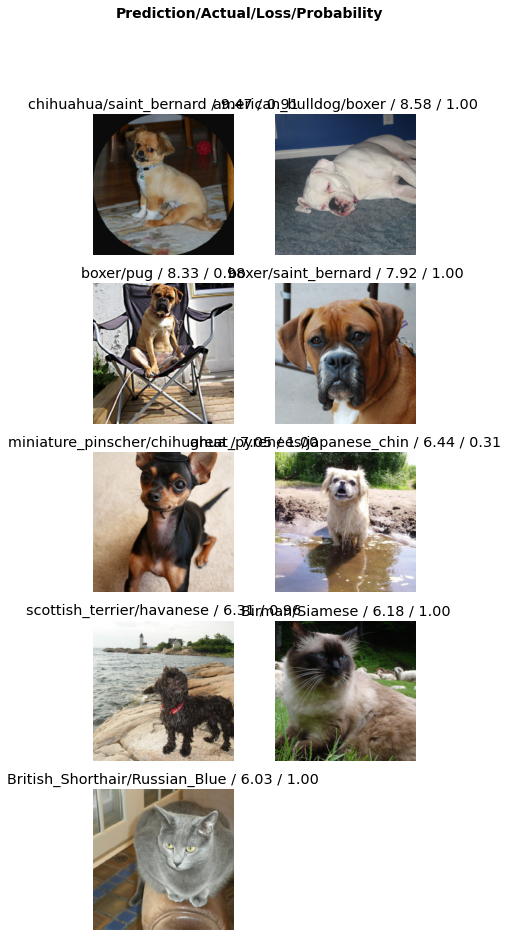

In [34]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(25, nrows = 5)